## CNN Example

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

## Load Dataset

## This code is for Google Colab to retreive the files.
///
os.environ['KAGGLE_CONFIG_DIR'] = '/content'  # remove the full path
!kaggle datasets download -d ansubkhan/malaria-detection  # https://www.kaggle.com/ansubkhan/malaria-detection
https://www.kaggle.com/syedamirraza/malaria-cell-image

# unzip and remove the zip
!unzip \*.zip && rm *.zip

my_data_dir = '/content/Malaria Detection/cell image'
print(os.listdir(my_data_dir) ) # returns 'test', and 'train
///

In [19]:
my_data_dir = 'D:\\Sandbox\\GitHub\\DATA\\cell_images' 
print(os.listdir(my_data_dir) ) # returns 'test', and 'train

['test', 'train']


In [20]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [21]:
print(os.listdir(test_path))
print(os.listdir(train_path))
print(os.listdir(train_path+'\\parasitized')[0])

['parasitized', 'uninfected']
['parasitized', 'uninfected']
C100P61ThinF_IMG_20150918_144104_cell_162.png


(148, 142, 3)


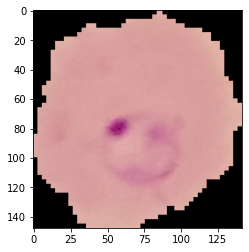

In [22]:
infected_cell_path = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'
infected_cell= imread(infected_cell_path)
print(infected_cell.shape)
plt.imshow(infected_cell)

(139, 160, 3)


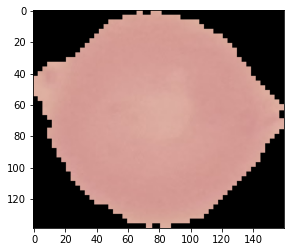

In [23]:
uninfected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
uninfected_cell = imread(uninfected_cell_path)
print(uninfected_cell.shape)
plt.imshow(uninfected_cell)

**Let's check how many images there are.**

## View data

Let's check how many images there are.

In [24]:
print(len(os.listdir(train_path+'\\parasitized')))
print(len(os.listdir(train_path+'\\uninfected')))

12480
12480


In [25]:
# Let's find out the average dimensions of these images
print(uninfected_cell.shape)
print(infected_cell.shape)

(139, 160, 3)
(148, 142, 3)


In [26]:
# Issue size is not the same.
# One option: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

## View data

C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


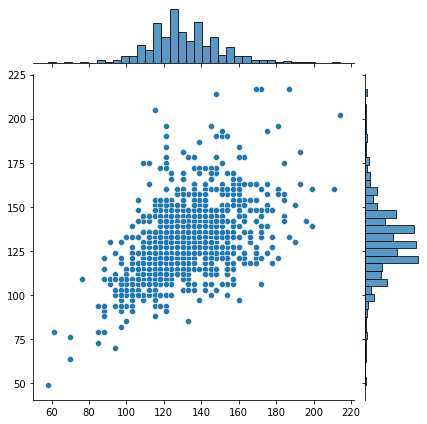

In [27]:
sns.jointplot(dim1,dim2)

### Make the image size almost similar

In [30]:
print(np.mean(dim1))
print(np.mean(dim2))

130.92538461538462
130.75


In [31]:
new_image_shape = (130,130,3)

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

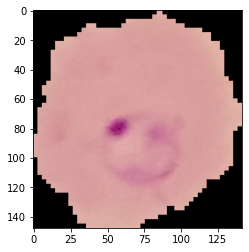

In [34]:
plt.imshow(infected_cell)

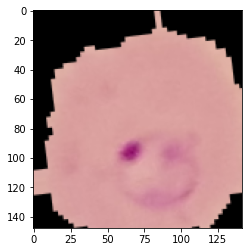

In [35]:
# show so random transformed images
plt.imshow(image_gen.random_transform(infected_cell))

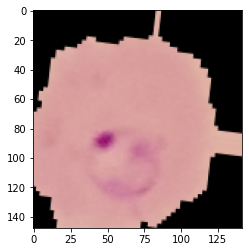

In [36]:
# show so random transformed images
plt.imshow(image_gen.random_transform(infected_cell))

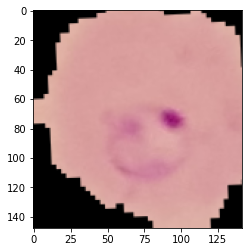

In [37]:
plt.imshow(image_gen.random_transform(infected_cell))

## MAIN CODE for TF learning

In [42]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [43]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## Model # 1

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [45]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = new_image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape = new_image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape = new_image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.Turn off 50% of neurons.

model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid

model.add(Dense(1))
model.add(Activation('sigmoid'))                   # last layer is signmoid

In [46]:
model.compile(loss='binary_crossentropy',          # Note this is another loss type
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

help(image_gen.flow_from_directory)

In [49]:
batch_size = 16

In [50]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size = new_image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [51]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size= new_image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [52]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
epochs = 20
history = model.fit(train_image_gen,epochs=epochs,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/20
  65/1560 [>.............................] - ETA: 7:23 - loss: 0.6894 - accuracy: 0.5683

from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

### Evaluate

In [ ]:
model.metrics_names

In [ ]:
model.evaluate_generator(test_image_gen)

In [ ]:
history_df = pd.DataFrame(model.history.history)
history_df[['loss','val_loss']].plot()

In [ ]:
from tensorflow.keras.preprocessing import image

### Predictions

In [ ]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

In [ ]:
pred_probabilities

In [ ]:
test_image_gen.classes

In [ ]:
y_predictions = pred_probabilities > 0.5

In [ ]:
# Numpy can treat this as True/False for us
y_predictions

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes, y_predictions))

In [ ]:
confusion_matrix(test_image_gen.classes, y_predictions)

In [ ]:
infected_image = image.load_img(infected_cell_path,target_size = new_image_shape)

In [ ]:
infected_image

In [ ]:
type(infected_image)

In [ ]:
infected_image = image.img_to_array(infected_image)

In [ ]:
type(infected_image)

In [ ]:
infected_image = np.expand_dims(infected_image, axis=0)

In [ ]:
infected_image.shape

In [ ]:
model.predict(infected_image)   # not infected is 0 else 1

In [ ]:
train_image_gen.class_indices

In [ ]:
test_image_gen.class_indices

#### Reports

#### Predictions go wrong!

### Conclusion : Final thoughts
This model has the accuracy and validation for the ....